Day 09 - Part 1: Finding peaks

In [100]:
import pandas as pd
data = pd.read_csv('test_data.csv', header=None)

def find_sum_peaks(data:pd.DataFrame):
    from findpeaks import findpeaks
    import numpy as np

    numbers = [str(no[0]) for no in data.values.tolist()]
    original_array = []
    for idx in range(len(numbers)):
        original_array.append([int(i) for i in numbers[idx]])

    # 100 is added to transpose vals
    transposed = np.array(original_array) + 100
    for val, rep in zip(range(10), range(9,-1,-1)):
        transposed = np.where(transposed == val + 100, rep, transposed)

    # Find peaks and cby mask method
    fp = findpeaks(method='mask')
    peaks = fp.fit(transposed)
    values = np.array(original_array)[peaks['Xdetect']] + 1
    return sum(values)

find_sum_peaks(data)

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


15

In [99]:
data = pd.read_csv('input_data.csv', header=None)
find_sum_peaks(data)

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


468

Part 2: Find largest basin

In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

data = pd.read_csv('input_data.csv', header=None)
numbers = [str(no[0]) for no in data.values.tolist()]
original_array = []
for idx in range(len(numbers)):
    original_array.append([int(i) for i in numbers[idx]])
original_array = np.array(original_array)

# Turn image to binary black and while. As 9's are white and non-9's are 0
img = np.where(original_array != 9,255, original_array)
img = np.where(img == 9, 0, img)
img = img.astype('uint8')

# Add padding to image
img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, 0)

# Create 3d matrix for image
rgb_image = np.uint8(np.empty(shape=(img.shape[0], img.shape[1], 3)))
for idx in range(3):
    rgb_image[:, :, idx] = img

dist_transform = cv.distanceTransform(img, cv.DIST_L2, 0)
norm = cv.normalize(dist_transform, dist_transform, 0, 1.0, cv.NORM_MINMAX);
ret, dist = cv.threshold(norm, 0.1, 1, cv.THRESH_BINARY)


dist_8u = dist.astype('uint8')
_, contours, _ = cv.findContours(dist_8u, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
markers = np.zeros(dist.shape, dtype=np.int32)
for i in range(len(contours)):
    cv.drawContours(markers, contours, i, (i+1), -1)









# # Distance transform to find sure foreground
# dist_transform = cv.distanceTransform(img, cv.DIST_L2, 0)
# ret, sure_fg = cv.threshold(dist_transform, 0, 255, 0)
# sure_fg = sure_fg.astype('uint8')
# ret, markers = cv.connectedComponents(sure_fg)
# markers = markers + 1


# final = cv.watershed(rgb_image, markers)
# rgb_image[final == -1] = [255, 0, 0]
# plt.imshow(rgb_image)
# # # Find contours
# # contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# # contours

ValueError: not enough values to unpack (expected 3, got 2)

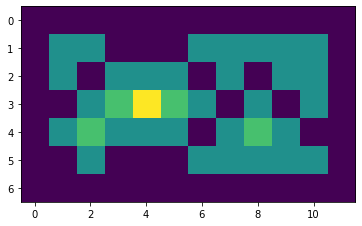

In [79]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

data = pd.read_csv('test_data.csv', header=None)
numbers = [str(no[0]) for no in data.values.tolist()]
original_array = []
for idx in range(len(numbers)):
    original_array.append([int(i) for i in numbers[idx]])
original_array = np.array(original_array)

# Turn image to binary black and while. As 9's are white and non-9's are 0
img = np.where(original_array != 9,255, original_array)
img = np.where(img == 9, 0, img)
img = img.astype('uint8')

# Add padding to image
img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, 0)

# Crete distance transformation map to determine which points has largest distance from borders.
dist_transform = cv.distanceTransform(img, cv.DIST_L2, 0)

df_transform = pd.DataFrame(dist_transform)
df_transform['maxi'] = df_transform.max(axis=1)
# df.maxi.nlargest(n=2)

# fill from 4,3
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
filled = cv.floodFill(img, mask, (8,4), 255);
# im_floodfill_inv = cv.bitwise_not(img)
# im_out = img | im_floodfill_inv
filled[0]

plt.imshow(dist_transform)


In [82]:
df = pd.DataFrame(dist_transform)
df['maxi'] = df.max(axis=1)
# df.maxi.nlargest(n=2)

# fill from 4,3
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
filled = cv.floodFill(img, mask, (8,4), 255);
# im_floodfill_inv = cv.bitwise_not(img)
# im_out = img | im_floodfill_inv
filled[0]
# plt.imshow(im_out)

9

In [59]:
NewImage = np.array(0)
df = pd.DataFrame(dist_transform)
df['maxi'] = df.max()
df.maxi.nlargest(n=10)

38    5.000000
37    4.472136
63    4.472136
64    4.472136
69    4.472136
70    4.472136
22    4.242640
39    4.242640
49    4.242640
7     4.123106
Name: maxi, dtype: float32

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]])

In [230]:
img = cv.imread('Eagle_coins.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(blackAndWhiteImage, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

blackAndWhiteImage

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [145]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 254, ..., 228, 228, 228],
       [253, 253, 253, ..., 225, 225, 225],
       [254, 254, 254, ..., 223, 223, 223]], dtype=uint8)